In [1]:
# Importing the libs

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage import color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

In [2]:
# Loading the image
x = cv.imread("./download.jpeg")
x = cv.cvtColor(x,cv.COLOR_BGR2GRAY)

# Calculating the parameters for canny edge detection using otsu threshold
high_thresh, thresh_im = cv.threshold(x, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
low_thresh = 0.5*high_thresh
print(low_thresh,high_thresh)

44.5 89.0


Number of eyes: 22


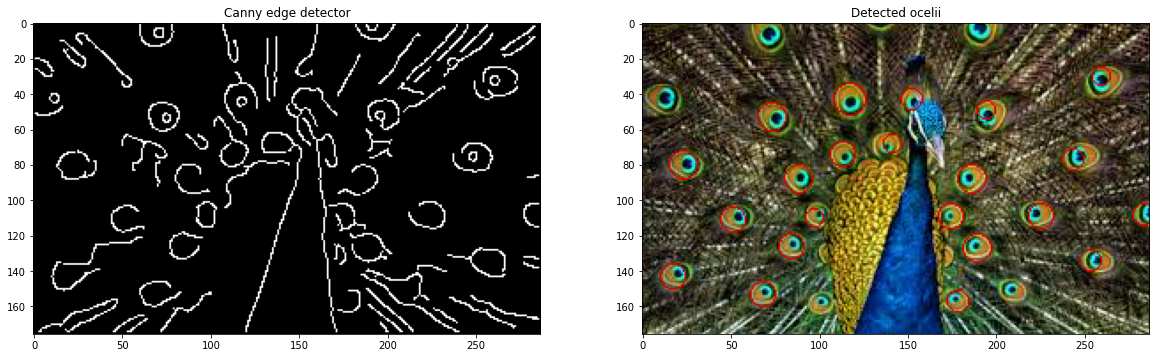

In [3]:

# Load picture
plt.rcParams["figure.figsize"] = (20,10)
img = cv.imread("./download.jpeg")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

# Detect edge
image = img_as_ubyte(gray)
edges = canny(image, sigma=2.2, low_threshold=low_thresh, high_threshold=high_thresh)

# Display the edge detected emage
plt.subplot(1,2,1)
plt.imshow(edges,cmap='gray')
plt.title('Canny edge detector')

# Range of radii that are allowed for the ocelli to be
hough_radii = np.arange(5, 20, 1)

# Makes an array of all the detected circles in the image
hough_res = hough_circle(edges, hough_radii)

# Selects the most prominent circles
accums, cx, cy, radii = hough_circle_peaks(
    hough_res, hough_radii, total_num_peaks=22, min_xdistance=15, min_ydistance=15)

print("Number of eyes:",cx.shape[0])

# Draw them on the image
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=img.shape)
    img[circy, circx] = (220, 0, 0)

plt.subplot(1,2,2)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Detected ocelii')
plt.show()